<a href="https://colab.research.google.com/github/shukkkur/Gender-Prediction-using-Sound/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import fuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3>1.</h3>

In [7]:
# Exploring the output of fuzzy.nysiis
print(fuzzy.nysiis('gray'))

# Testing equivalence of similar sounding words
fuzzy.nysiis('colour') == fuzzy.nysiis('color')

GRY


True

<h3>2.</h3>

In [10]:
# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited.
author_df = pd.read_csv('nytkids_yearly.csv', delimiter=';')

# Looping through author_df['Author'] to extract the authors first names
first_name = []
for name in author_df['Author']:
    first_name.append(name.split()[0])

# Adding first_name as a column to author_df
author_df['first_name'] = first_name

# Checking out the first few rows of author_df
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


<h3>3.</h3>

In [11]:
# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []
for name in author_df['first_name']:
    nysiis_name.append(fuzzy.nysiis(name))

# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name

# Printing out the difference between unique firstnames and unique nysiis_names:
len(np.unique(author_df.first_name))-len(np.unique(author_df.nysiis_name))
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR


<h3>4.</h3>

In [14]:
# Reading in datasets/babynames_nysiis.csv, which is semicolon delimited.
babies_df = pd.read_csv('babynames_nysiis.csv', delimiter=';')

# Looping through babies_df to and filling up gender
gender = []
# ... YOUR CODE FOR TASK 4 ...
for i in range(len(babies_df)):
    if babies_df.iloc[i]['perc_male'] > babies_df.iloc[i]['perc_female']:
        gender.append('M')
    elif babies_df.iloc[i]['perc_male'] < babies_df.iloc[i]['perc_female']:
        gender.append('F')
    else:
        gender.append('N')
    

# Adding a gender column to babies_df
babies_df['gender'] = gender

# Printing out the first few rows of babies_df
babies_df.head()

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


<h3>5.</h3>

In [16]:
# This function returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []
for name in author_df['nysiis_name']:
    nloc = locate_in_list(list(babies_df['babynysiis']), name)
    if nloc == -1:
        author_gender.append('Unknown')
    else:
        author_gender.append(babies_df['gender'][nloc])

# Adding author_gender to the author_df
author_df['author_gender'] = author_gender

# Counting the author's genders
print(author_df['author_gender'].value_counts())

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64


<h3>6.</h3>

In [17]:
# Creating a list of unique years, sorted in ascending order.
years = sorted(author_df.Year.unique())

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for year in years:
    males_by_yr.append(len(author_df[(author_df['author_gender']=='M') & (author_df['Year']==year)]))
    females_by_yr.append(len(author_df[(author_df['author_gender']=='F') & (author_df['Year']==year)]))
    unknown_by_yr.append(len(author_df[(author_df['author_gender']=='Unknown') & (author_df['Year']==year)]))
    
# Printing out yearly values to examine changes over time
print(males_by_yr)

[8, 19, 27, 21, 21, 11, 21, 18, 25, 20]


7.

Text(0.5, 0, 'years')

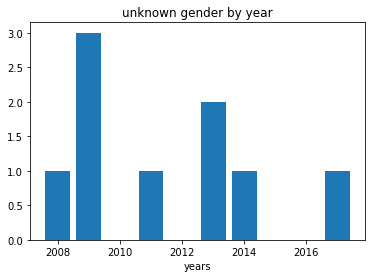

In [19]:
# Plotting the bar chart
plt.bar(years, unknown_by_yr)

# [OPTIONAL] - Setting a title, and axes labels
plt.title('unknown gender by year')
plt.xlabel('years')

<h3>8.</h3>

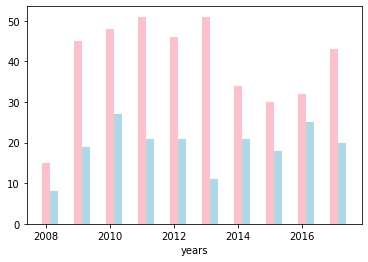

In [21]:
# Creating a new list, where 0.25 is added to each year
years_shifted = list(np.array(years) + 0.25)

# Plotting males_by_yr by year
plt.bar(years_shifted, males_by_yr, width=0.25, color='lightblue')

# Plotting females_by_yr by years_shifted
plt.bar(years, females_by_yr, width=0.25, color='pink')

# [OPTIONAL] - Adding relevant Axes labels and Chart Title
plt.xlabel('years')

plt.show()